<a href="https://colab.research.google.com/github/Ekram49/DS-Unit-2-Applied-Modeling/blob/master/Ekram_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Ekram49/DS-Unit-1-Build/master/ContinousDataset.csv')
df.head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second


In [3]:
df = df.rename(columns={"Team 1": "Team_1", "Team 2": "Team_2",
                   "Team 1": "Team_1","Match Date":"Match_Date"})
df.head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second


In [4]:
df1 = df[(((df['Team_1'] == 'India') | (df['Team_2'] == 'India'))) & (((df['Team_1'] == 'Pakistan') | (df['Team_2'] == 'Pakistan'))) ]

df1.head()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
50,50,ODI # 54,Pakistan,India,Winner1stInning,Quetta,"Oct 1, 1978",India,Pakistan,Home,Away,Second,First
51,51,ODI # 55,Pakistan,India,Winner2ndInning,Sialkot,"Oct 13, 1978",Pakistan,Pakistan,Home,Away,Second,First
154,155,ODI # 162,Pakistan,India,Winner1stInning,Gujranwala,"Dec 3, 1982",Pakistan,Pakistan,Home,Away,First,Second
155,156,ODI # 163,Pakistan,India,Winner1stInning,Multan,"Dec 17, 1982",Pakistan,Pakistan,Home,Away,First,Second
156,157,ODI # 164,Pakistan,India,Winner1stInning,Lahore,"Dec 31, 1982",India,Pakistan,Home,Away,Second,First


In [5]:
df1.tail()

,Unnamed: 0,Scorecard,Team_1,Team_2,Margin,Ground,Match_Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
6960,3218,ODI # 3372,Pakistan,India,Winner2ndInning,Birmingham,"Jun 15, 2013",India,England,Neutral,Neutral,First,Second
7059,3317,ODI # 3479,Pakistan,India,Winner2ndInning,Dhaka,"Mar 2, 2014",Pakistan,Bangladesh,Neutral,Neutral,Second,First
7177,3435,ODI # 3602,Pakistan,India,Winner1stInning,Adelaide,"Feb 15, 2015",India,Australia,Neutral,Neutral,Second,First
7440,3698,ODI # 3878,Pakistan,India,Winner1stInning,Birmingham,"Jun 4, 2017",India,England,Neutral,Neutral,Second,First
7454,3712,ODI # 3894,Pakistan,India,Winner1stInning,The Oval,"Jun 18, 2017",Pakistan,England,Neutral,Neutral,First,Second


# The above data is the record of all the matches between India and Pakistan. I wan to predict the 'Winner' column

# It's a classification problem

# There are two classes, and they are not imbalanced.

In [6]:
df1['Winner'].value_counts(normalize = True)

Pakistan    0.585366
India       0.414634
Name: Winner, dtype: float64

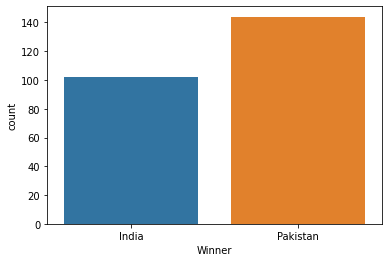

In [18]:
sns.countplot(df1['Winner'])

# majority class frequency  58.54%. So accuracy score can be used.

# I will use time based split

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split

In [8]:
df1['Match_Date'] =  datetime.strptime(df1['Match_Date'],'%b%d%Y')

TypeError: ignored

In [12]:
df1['Match_Date'] = pd.to_datetime(df1['Match_Date'], infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df1['Match_Date']

50       Oct 1, 1978
51      Oct 13, 1978
154      Dec 3, 1982
155     Dec 17, 1982
156     Dec 31, 1982
            ...     
6960    Jun 15, 2013
7059     Mar 2, 2014
7177    Feb 15, 2015
7440     Jun 4, 2017
7454    Jun 18, 2017
Name: Match_Date, Length: 246, dtype: object

In [0]:
train, test = train_test_split(df1, train_size = .8, test_size = .2,
                               stratify = df1['Winner'], random_state =42)

In [0]:
train, val = train_test_split(train, train_size = .8, test_size = .2,
                              stratify = train['Winner'], random_state =42)